# Visuals
Documentation on the visuals used in the project.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append("../")
from src.data import make_purpleair_dataset, make_dashboard
from src.visualization import visualize

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

---

# Table of Contents
1. [Dashboard Visual](#dashboard)

---

<a id="dashboard"></a>

# Dashboard Visuals
In the following cells we explore the visuals available for the dashboard.

In [2]:
data = pd.read_csv("../data/interim/data-dashboard.csv",index_col=0,
                   parse_dates=True,infer_datetime_format=True)
dash = visualize.Dashboard()

In [6]:
at = pd.read_csv("../data/interim/airthings-dashboard-test.csv",index_col=0,parse_dates=True,infer_datetime_format=True)
meta = pd.read_csv("../data/admin/airthings_meta.csv")

In [8]:
temp = at.merge(right=meta,left_on=["device"],right_on=["mac_address"],how="left")
temp["timestamp"] = at.index
temp.set_index("timestamp")

,rh,radon_acute,radon_chronic,temperature,pressure,co2,voc,device,id,ip_address,mac_address,location,lat,long,kit_no
timestamp,,,,,,,,,,,,,,,
2022-04-01 11:30:00,37.5,19.0,12.0,NaN,998.340000,550.000000,97.000000,2930040905,AT-0905,100.95.248.31,2930040905,NaN,NaN,NaN,5
2022-04-01 11:45:00,37.5,19.0,12.0,21.960000,998.260000,554.600000,90.133333,2930040905,AT-0905,100.95.248.31,2930040905,NaN,NaN,NaN,5
2022-04-01 12:00:00,37.5,20.6,12.0,21.965714,998.092000,558.133333,93.000000,2930040905,AT-0905,100.95.248.31,2930040905,NaN,NaN,NaN,5
2022-04-01 12:15:00,37.5,21.0,12.0,21.986000,997.830667,560.533333,85.933333,2930040905,AT-0905,100.95.248.31,2930040905,NaN,NaN,NaN,5
2022-04-01 12:30:00,37.5,21.0,12.0,21.994667,997.374667,561.533333,86.866667,2930040905,AT-0905,100.95.248.31,2930040905,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15 06:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930042601,AT-2601,100.74.119.119,2930042601,NaN,NaN,NaN,7
2022-05-15 06:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930042601,AT-2601,100.74.119.119,2930042601,NaN,NaN,NaN,7
2022-05-15 06:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930042601,AT-2601,100.74.119.119,2930042601,NaN,NaN,NaN,7


## Aggregate Timeseries
Timeseries plot that includes all data. The `timeseries_aggregate` function requires two parameters to generate a plot:
* `data`: the data frame containing the necessary data in tidy format from all kits
* `param`: the parameter to plot

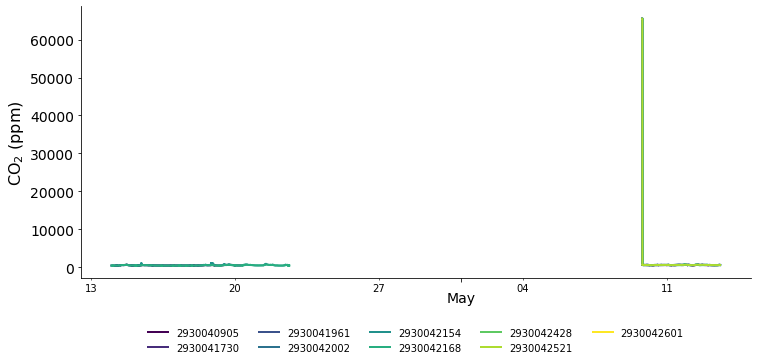

In [77]:
dash.timeseries_aggregate(data,"co2",id_col="device")

## Individual Time Series
The same as above but on an individual level: `timeseries_individual`. This method requires an additional parameter, `device` which corresponds to the kit or device ID.

2930040905


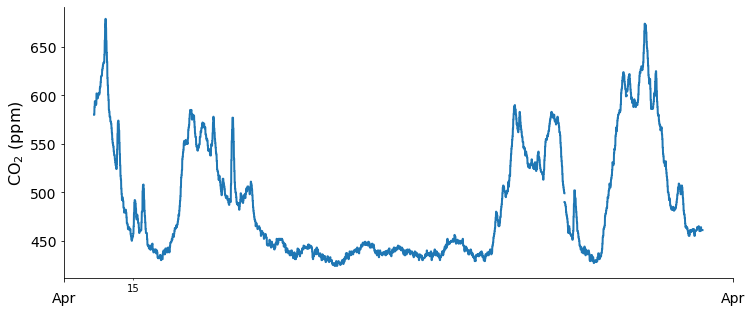

2930041730


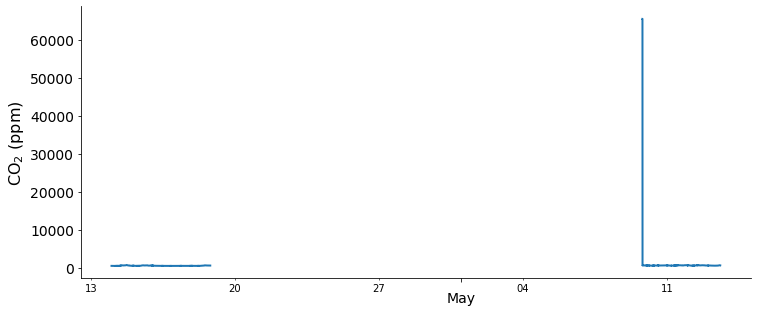

2930041961


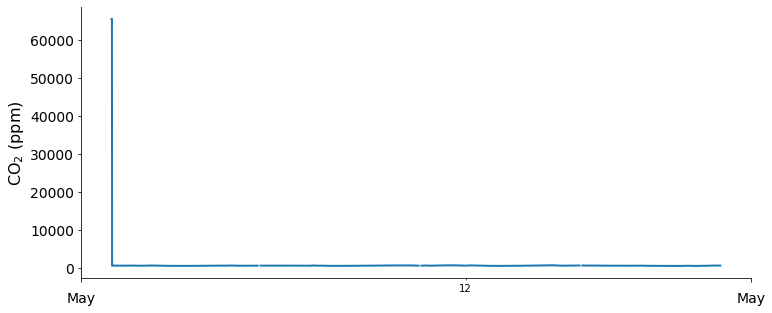

2930042002


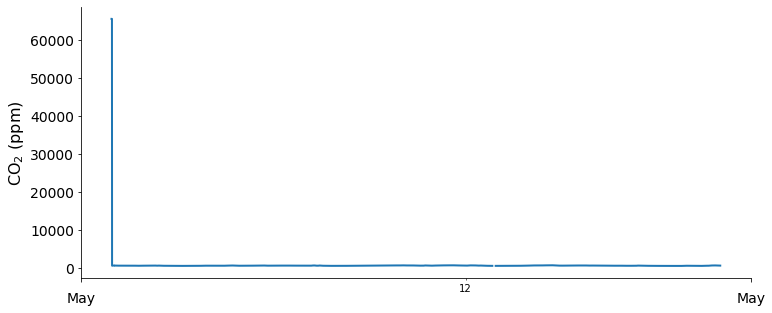

2930042154


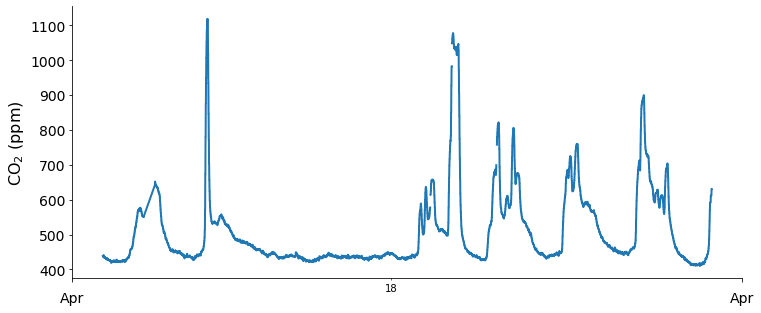

2930042168


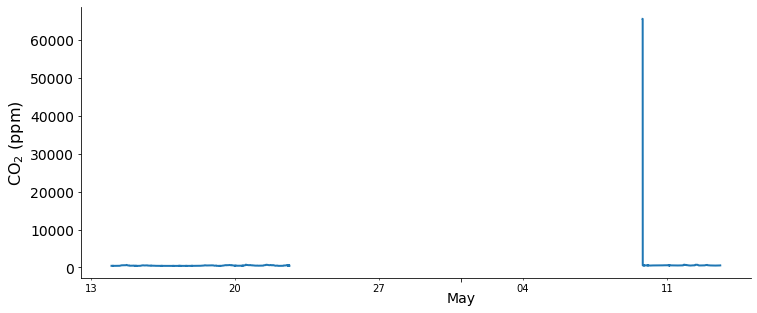

2930042428


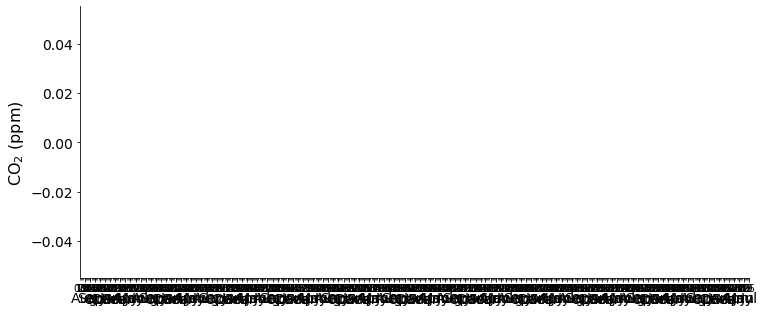

2930042521


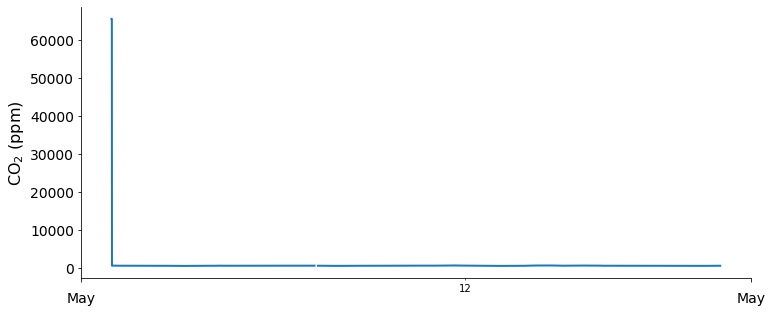

2930042601


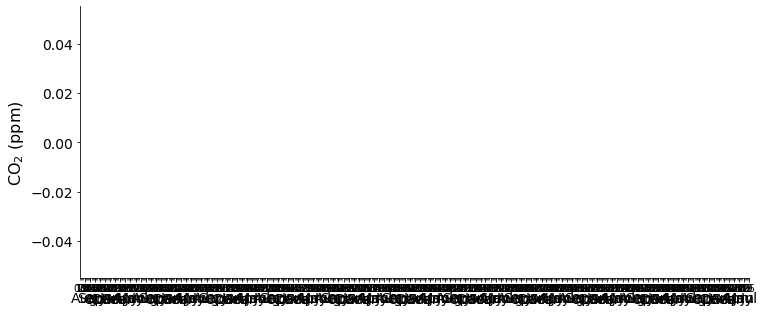

In [78]:
for device in data["device"].unique():
    print(device)
    dash.timeseries_individual(data,device,"co2")

## Individual Heatmap
Heatmap showing the hourly concentration for a given parameter over the course of a week for each week.

2930040905


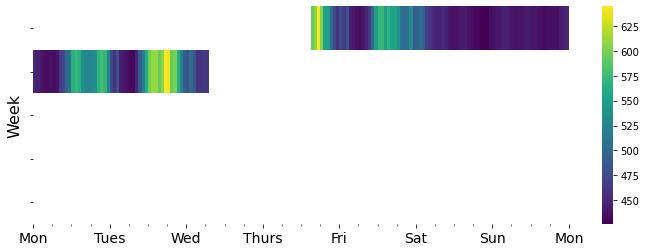

2930041730


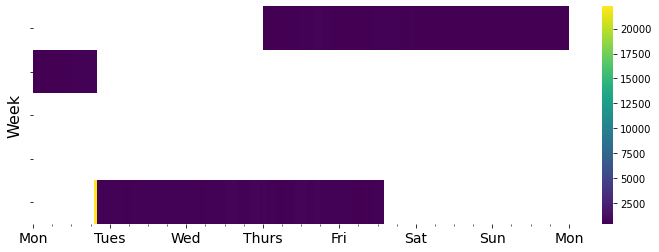

2930041961


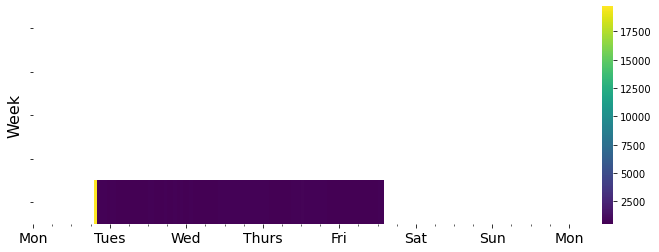

2930042002


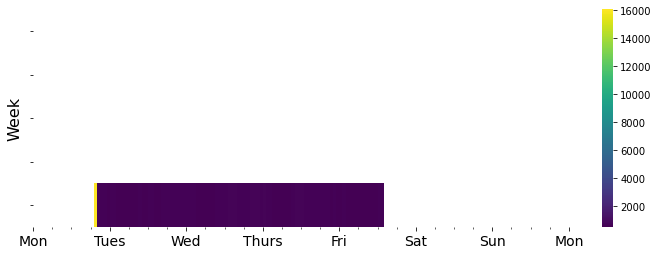

2930042154


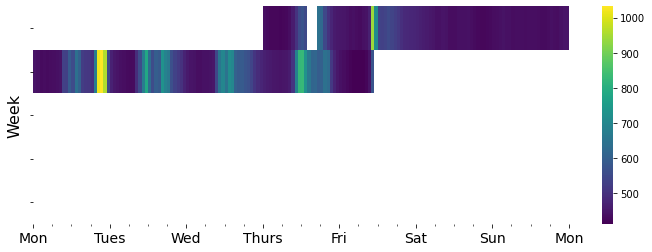

2930042168


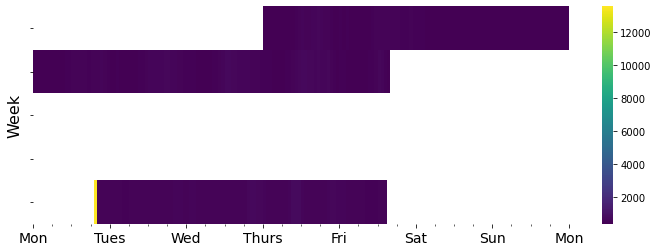

2930042428


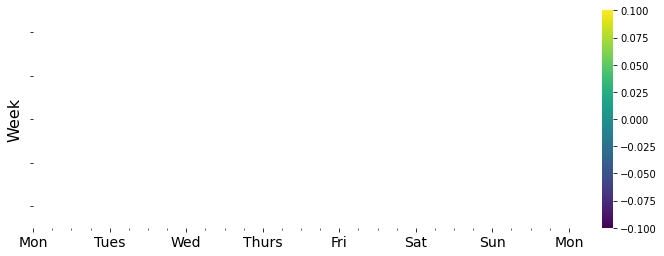

2930042521


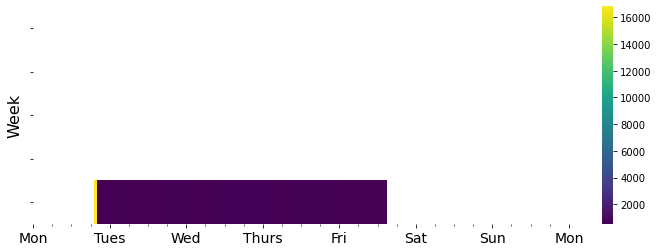

2930042601


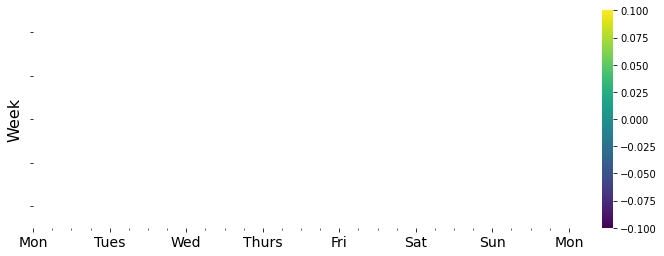

In [81]:
for device in data["device"].unique():
    print(device)
    dash.heatmap_individual(data,device,"co2",id_col="device")

## Additional Parameters
Each of the figures above toakes the same additional parameters:
* `id_col`: the column that we separate the data out by, the default is "kit_no" but this could also be "device"
* `show`: a boolean to show the figure -- best to turn this to False when running from the command line
* `save`: a boolean to save the figure
* `subdir`: the subdirectory to save the figure in -- useful when autogenerating the dashboard figures.

---